In [20]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import style

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [21]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [22]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [23]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [24]:
#  3. Convert the June temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [25]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_jun = pd.DataFrame(results, columns=['date','June Temps'])

In [26]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_jun.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [27]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)


In [28]:
# 7. Convert the December temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [29]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(results, columns=['date','December Temps'])

In [30]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# D3. Additional Queries

## June and December temperature - Box and Whisker Plots

Text(0.5, 0, 'Month')

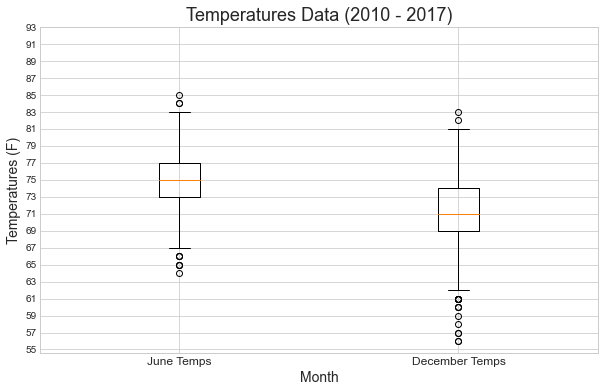

In [32]:
#Style
plt.style.use('seaborn-whitegrid')

#Plot the Box & Whiskers
x_labels = ["June Temps", "December Temps"]
temps = [df_jun["June Temps"], df_dec["December Temps"]]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(temps, labels=x_labels)


#Ticks & Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

ax.set_yticks(np.arange(55, 95, step=2.0))
ax.set_title('Temperatures Data (2010 - 2017)',fontsize=18)
ax.set_ylabel('Temperatures (F)',fontsize=14)
ax.set_xlabel("Month",fontsize=14)

# June and December Rainfall

In [33]:
#Rain in June (2010 - 2017)
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
df_rain_june = pd.DataFrame(results, columns=['date','June Rain'])
df_rain_june.describe()

,June Rain
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [34]:
#Rain in December (2010 - 2017)
results01 = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
df_rain_dec = pd.DataFrame(results01, columns=['date','Dec Rain'])
df_rain_dec.describe()

,Dec Rain
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


# Rainfall for June and Dec. - Box and Whisker

Text(0.5, 0, 'Month')

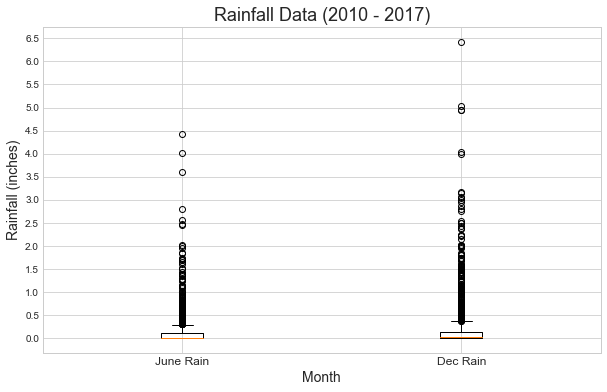

In [35]:
#Drop the null values:
df_rain_june = df_rain_june.dropna()
df_rain_dec = df_rain_dec.dropna()

#Style
plt.style.use('seaborn-whitegrid')

#Plot the Box & Whiskers
x_labels = ["June Rain", "Dec Rain"]
temps = [df_rain_june["June Rain"], df_rain_dec["Dec Rain"]]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(temps, labels=x_labels)


#Ticks & Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

ax.set_yticks(np.arange(0, 7, step=0.5))
ax.set_title('Rainfall Data (2010 - 2017)',fontsize=18)
ax.set_ylabel('Rainfall (inches)',fontsize=14)
ax.set_xlabel("Month",fontsize=14)